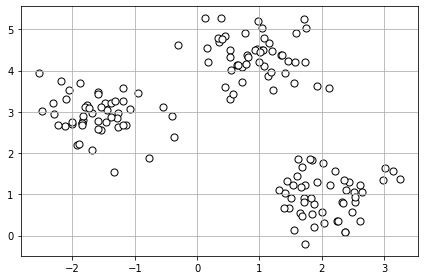

In [2]:
from sklearn.datasets import make_blobs

X,y  = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', ec='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

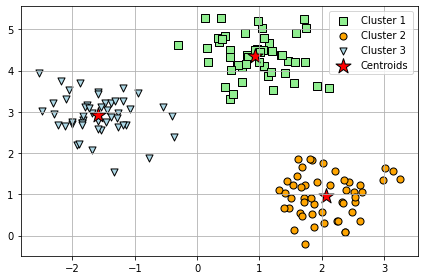

In [6]:
plt.scatter(X[y_km==0, 0], X[y_km==0, 1], s=50, c='lightgreen', ec='black', marker='s', label='Cluster 1')
plt.scatter(X[y_km==1, 0], X[y_km==1, 1], s=50, c='orange', ec='black', marker='o', label='Cluster 2')
plt.scatter(X[y_km==2, 0], X[y_km==2, 1], s=50, c='lightblue', ec='black', marker='v', label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', ec='black', label='Centroids')
plt.legend(scatterpoints=1)

plt.grid()
plt.tight_layout()
plt.show()

In [7]:
print('DIstortion: %.2f' % km.inertia_)

DIstortion: 72.48


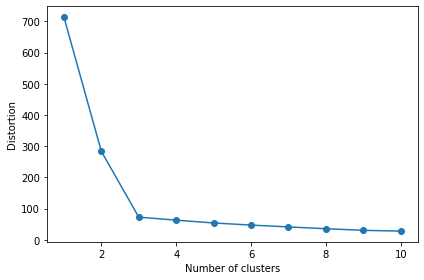

In [8]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

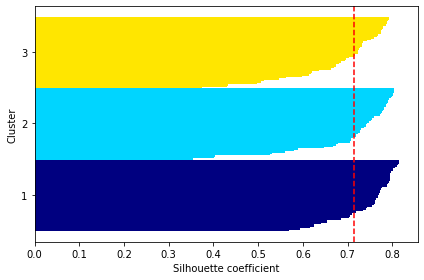

In [13]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

import numpy as np
import  matplotlib.pyplot as plt
from  matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0,0
yticks = []
for i , c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1, ec='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', ls='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

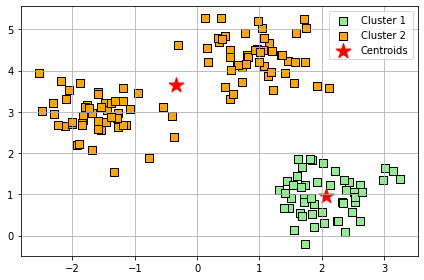

In [14]:
km= KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km==0, 0], X[y_km==0, 1], s=50, c='lightgreen', ec='black', marker='s', label='Cluster 1')
plt.scatter(X[y_km==1, 0], X[y_km==1, 1], s=50, c='orange', ec='black', marker='s', label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='Centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

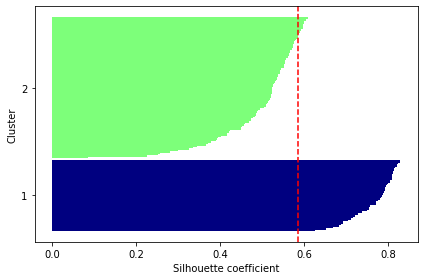

In [19]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0,0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1, ec='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', ls='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

In [28]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5,3]) * 10
df  = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [29]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [30]:
from scipy.cluster.hierarchy import linkage
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [31]:
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')

In [32]:
pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'], index=['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])])


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


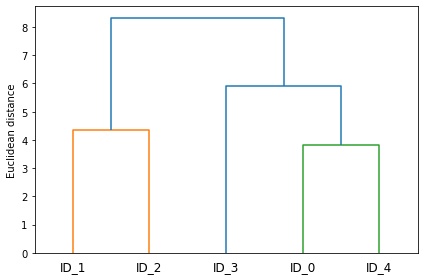

In [33]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_clusters, labels=labels)
plt.ylabel('Euclidean distance')
plt.tight_layout()
plt.show()

/var/folders/tl/3mcdykwx5g145dz_cpc1vdxc0000gn/T/ipykernel_22396/1785202204.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([''] + list(df_rowclust.columns))
/var/folders/tl/3mcdykwx5g145dz_cpc1vdxc0000gn/T/ipykernel_22396/1785202204.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels([''] + list(df_rowclust.index))


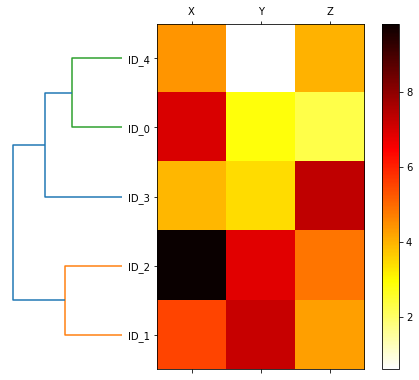

In [44]:
fig = plt.figure(figsize=(8,8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)

fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()


/var/folders/tl/3mcdykwx5g145dz_cpc1vdxc0000gn/T/ipykernel_22396/1342431740.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([''] + list(df_rowclust.columns))
/var/folders/tl/3mcdykwx5g145dz_cpc1vdxc0000gn/T/ipykernel_22396/1342431740.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels([''] + list(df_rowclust.index))


In [45]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels= ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 2 1]


In [46]:
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels= ac.fit_predict(X)
print('Cluster labels : %s' % labels)

Cluster labels : [0 1 1 0 0]


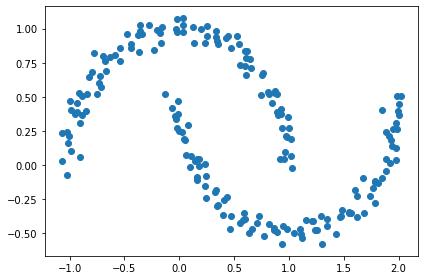

In [47]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

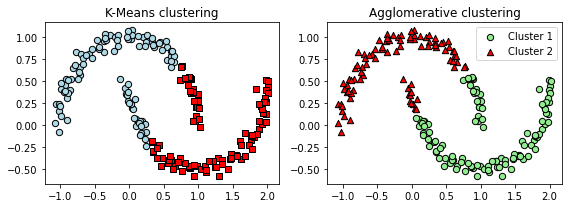

In [49]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(8,3))
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km ==0, 1], c='lightblue', ec='black', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km ==1, 1], c='red', ec='black', marker='s', s=40, label='cluster 2')
ax1.set_title('K-Means clustering')
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')

y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0, 0], X[y_ac==0, 1], c='lightgreen', ec='black', marker='o', s=40, label='Cluster 1')
ax2.scatter(X[y_ac==1, 0], X[y_ac==1, 1], c='red', ec='black', marker='^', s=40, label='Cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.tight_layout()
plt.show()

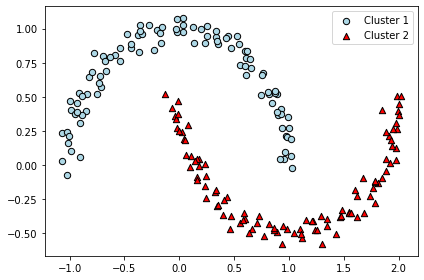

In [50]:
from sklearn.cluster import DBSCAN
db =DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0, 0], X[y_db==0, 1], c='lightblue', ec='black', marker='o', s=40, label='Cluster 1')
plt.scatter(X[y_db==1, 0], X[y_db==1, 1], c='red', ec='black', marker='^', s=40, label='Cluster 2')
plt.legend()
plt.tight_layout()
plt.show()


In [51]:
!find *ubyte

t10k-images-idx3-ubyte
t10k-labels-idx1-ubyte
train-images-idx3-ubyte
train-labels-idx1-ubyte


In [53]:
import os 
import struct
import numpy as np 

def load_mnist(path, kind='train'):
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
        
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2
    return images, labels

In [54]:
X_train, y_train = load_mnist('', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]) )

X_test, y_test = load_mnist('', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 60000, columns: 784
Rows: 10000, columns: 784


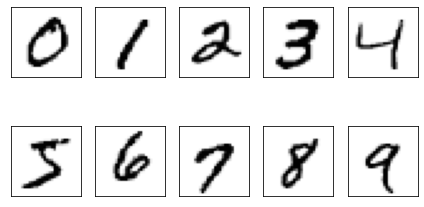

In [58]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28,28)
    ax[i].imshow(img, cmap='Greys')
    
ax[0].set_xticks([])
ax[1].set_yticks([])
plt.tight_layout()
plt.show()

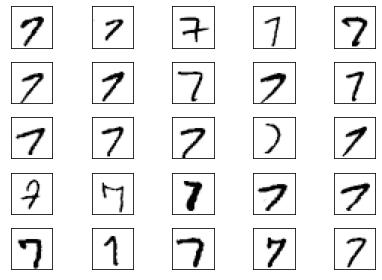

In [59]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [60]:
import numpy as np
np.savez_compressed('mnist_scaled.npz', X_train=X_train,y_train=y_train, X_test=X_test, y_test=y_test)

In [61]:
mnist = np.load('mnist_scaled.npz')

In [62]:
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

In [63]:
X_train = mnist['X_train']

In [65]:
X_train, y_train, X_test, y_test = [mnist[f] for f in mnist.files]

In [ ]:
import numpy as np
import sys

class NeuralNetMLP(object):
    
    
    def __init__(self, n_hidden=30, l2=0, epochs=100, eta=0.001, shuffle=True, minibatch_size=1, seed=None):
        
        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size
        
    def _onehot(self, y, n_classes):
        
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1
            
        return onehot.T
    
def _sigmoid(self, z):
    return 1/ (1 + np.exp(-np.clip(z, -250, 250)))

def _forward(self, X):
    z_h = np.dot(X, self.w_h) + self.b_h
    
    a_h = self._sigmoid(z_h)
    
    z_out = np.dot(a_h, self.w_out) + self.b_out
    
    return z_h, a_h, z_out, a_out

def _compute_cost(self, y_enc, output):
    
    L2_term = (self.l2 * (np.sum(self.w_h ** 2) + np.sum(self.w_out ** 2)))
    term1 = -y_enc * (np.log(output))
    term2 = (1- y_enc) * np.log(1-output)
    cost = np.sum(term1 - term2) + L2_term
    
    